# Teste técnico Oncase
## Clustering
Teste técnico realizado pela empresa Oncase para testar conhecimentos na área de ciência de dados. Descrição do problema:

Sugerir o número de clusters ótimo a partir da análise dos dados fornecidos.

- Métricas: elbow method, silhouette score, calinski-harabasz e davies-bouldin;
- Arquivos referentes aos dados: clusterization.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
dataset = pd.read_csv(r"C:\Users\laila\Documents\clustering-oncase\clusterization.csv")
dataset.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.742252,0.475308,1.836206,0.742252,1.725555,1.553581,1.272966,0.575115,0.938788,0.852863
std,1.528055,2.329950,2.644570,1.528055,1.837623,1.790017,1.537749,1.625011,1.376636,1.463754
min,-6.181360,-9.204687,-8.180204,-6.181360,-5.413946,-7.579985,-5.455328,-6.329266,-4.985370,-6.206228
25%,-0.281585,-1.116588,0.013903,-0.281585,0.473721,0.416780,0.294580,-0.414632,0.022146,-0.110357
50%,0.758129,0.282782,1.792516,0.758129,1.660058,1.549140,1.306885,0.666649,0.939787,0.871200
75%,1.791262,1.924617,3.592834,1.791262,2.919211,2.705694,2.282172,1.672459,1.860470,1.824929
max,6.389245,10.448874,12.617171,6.389245,9.729344,9.415774,7.171006,7.421327,7.266332,6.640401


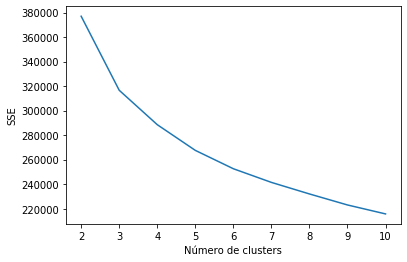

,Silhouette Coefficient,Calinski-Harabasz Score,Davies-Bouldin Score
n_clusters,,,
2,0.206765,4523.445787,1.710846
3,0.191504,4123.683013,1.577667
4,0.165982,3502.629305,1.602986
5,0.151017,3126.498999,1.607826
6,0.142818,2827.260744,1.660476
7,0.130930,2579.931104,1.672312
8,0.131408,2388.114783,1.652458
9,0.131576,2249.264130,1.638095
10,0.129722,2123.294966,1.595634


In [3]:
# Método Elbow

sse = {} # soma dos erros quadráticos
scores = {'n_clusters': [], 'Silhouette Coefficient': [], 'Calinski-Harabasz Score': [], 'Davies-Bouldin Score': []}
for k in range(2, 11):
    scores['n_clusters'].append(k)
    kmeans = KMeans(n_clusters=k).fit(dataset)
    label = kmeans.labels_
    scores['Silhouette Coefficient'].append(silhouette_score(dataset, label))
    scores['Calinski-Harabasz Score'].append(calinski_harabasz_score(dataset, label))
    scores['Davies-Bouldin Score'].append(davies_bouldin_score(dataset, label))
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

scores = pd.DataFrame(scores)
scores.set_index('n_clusters', inplace=True)
scores

## Análise final

Percebe-se no gráfico de SSE x Número de Clusters o ponto de queda acentuado quando o número de clusters é de 3, sendo assim esse o valor ótimo de clusters para o dataset analisado.